In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pharma-sales-data/salesdaily.csv
/kaggle/input/pharma-sales-data/salesweekly.csv
/kaggle/input/pharma-sales-data/salesmonthly.csv
/kaggle/input/pharma-sales-data/saleshourly.csv


# Importing Library

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
# from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, roc_curve, auc, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

2024-05-11 04:42:13.380018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 04:42:13.380170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 04:42:13.684484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError

In [4]:
import plotly.express as px

In [5]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df=pd.read_csv('/kaggle/input/pharma-sales-data/salesweekly.csv')

# Performing EDA

### Entire Data

In [8]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64


In [10]:
df.shape

(302, 9)

### 1) M01AB

In [11]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AB', color_discrete_sequence=['blue'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


### 2) M01AE

In [12]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['green'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


### 3) N02BA  

In [13]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='N02BA', color_discrete_sequence=['red'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


### 4) N02BE

In [14]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='N02BE', color_discrete_sequence=['orange'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


### 5) N05B

In [15]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='N05B', color_discrete_sequence=['brown'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

### 6) N05C


In [16]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['pink'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


### 7) R03


In [17]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['orange'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


### 8) R06

In [18]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['violet'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

### Group sales data by ATC 

In [21]:
# group sales data by ATC categories and store the aggregated 
# results in a dictionary for further analysis or processing.
atc_categories = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
category_sales = {}
for category in atc_categories:
    category_sales[category] = df.groupby(category).sum()

In [22]:
# Assuming 'salesdaily' is your DataFrame and 'datum' column contains dates as strings
df['datum'] = pd.to_datetime(df['datum'])

In [23]:
print(df['datum'].min())
print(df['datum'].max())


2014-01-05 00:00:00
2019-10-13 00:00:00


# Reshape the Data

### 1) M01AB

In [24]:
df_m01ab = df[['datum','M01AB']]
df_m01ab

,datum,M01AB
0,2014-01-05,14.00
1,2014-01-12,29.33
2,2014-01-19,30.67
3,2014-01-26,34.00
4,2014-02-02,31.02
...,...,...
297,2019-09-15,35.51
298,2019-09-22,46.84
299,2019-09-29,34.01
300,2019-10-06,38.70


In [25]:
# Reshape the dataframe
df_new1 = df_m01ab.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new1

,datum,Drug,Quantity
0,2014-01-05,M01AB,14.00
1,2014-01-12,M01AB,29.33
2,2014-01-19,M01AB,30.67
3,2014-01-26,M01AB,34.00
4,2014-02-02,M01AB,31.02
...,...,...,...
297,2019-09-15,M01AB,35.51
298,2019-09-22,M01AB,46.84
299,2019-09-29,M01AB,34.01
300,2019-10-06,M01AB,38.70


In [26]:
# Label encode 'Drug' column and add 0 to each encoded value
df_new1['Drug'] = le.fit_transform(df_new1['Drug'])

# Display the modified DataFrame
print(df_new1)

         datum  Drug  Quantity
0   2014-01-05     0     14.00
1   2014-01-12     0     29.33
2   2014-01-19     0     30.67
3   2014-01-26     0     34.00
4   2014-02-02     0     31.02
..         ...   ...       ...
297 2019-09-15     0     35.51
298 2019-09-22     0     46.84
299 2019-09-29     0     34.01
300 2019-10-06     0     38.70
301 2019-10-13     0      7.67

[302 rows x 3 columns]


In [27]:
# Create a new index column
df_new1['Index'] = range(len(df_new1))

# Set 'Index' as the index
df_new1.set_index('Index', inplace=True)

df_new1

,datum,Drug,Quantity
Index,,,
0,2014-01-05,0,14.00
1,2014-01-12,0,29.33
2,2014-01-19,0,30.67
3,2014-01-26,0,34.00
4,2014-02-02,0,31.02
...,...,...,...
297,2019-09-15,0,35.51
298,2019-09-22,0,46.84
299,2019-09-29,0,34.01


### 2) M01AE

In [28]:
df_m01ae = df[['datum','M01AE']]
df_m01ae

,datum,M01AE
0,2014-01-05,11.670
1,2014-01-12,12.680
2,2014-01-19,26.340
3,2014-01-26,32.370
4,2014-02-02,23.350
...,...,...
297,2019-09-15,30.977
298,2019-09-22,25.396
299,2019-09-29,22.498
300,2019-10-06,32.502


In [29]:
# Reshape the dataframe
df_new2 = df_m01ae.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new2

,datum,Drug,Quantity
0,2014-01-05,M01AE,11.670
1,2014-01-12,M01AE,12.680
2,2014-01-19,M01AE,26.340
3,2014-01-26,M01AE,32.370
4,2014-02-02,M01AE,23.350
...,...,...,...
297,2019-09-15,M01AE,30.977
298,2019-09-22,M01AE,25.396
299,2019-09-29,M01AE,22.498
300,2019-10-06,M01AE,32.502


In [30]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new2['Drug'] = le.fit_transform(df_new2['Drug']) + 1

# Display the modified DataFrame
print(df_new2)

         datum  Drug  Quantity
0   2014-01-05     1    11.670
1   2014-01-12     1    12.680
2   2014-01-19     1    26.340
3   2014-01-26     1    32.370
4   2014-02-02     1    23.350
..         ...   ...       ...
297 2019-09-15     1    30.977
298 2019-09-22     1    25.396
299 2019-09-29     1    22.498
300 2019-10-06     1    32.502
301 2019-10-13     1     6.237

[302 rows x 3 columns]


In [31]:
# Assuming your DataFrame is named df and the column containing quantities is named 'quantity'
highest_quantity_index = df_new2['Quantity'].idxmax()
highest_quantity_value = df_new2.loc[highest_quantity_index, 'Quantity']

print("Index of highest quantity:", highest_quantity_index)
print("Highest quantity:", highest_quantity_value)


Index of highest quantity: 265
Highest quantity: 53.571


In [32]:
# Create a new index column
df_new2['Index'] = range(len(df_new2))
# Set 'Index' as the index
df_new2.set_index('Index', inplace=True)

df_new2

,datum,Drug,Quantity
Index,,,
0,2014-01-05,1,11.670
1,2014-01-12,1,12.680
2,2014-01-19,1,26.340
3,2014-01-26,1,32.370
4,2014-02-02,1,23.350
...,...,...,...
297,2019-09-15,1,30.977
298,2019-09-22,1,25.396
299,2019-09-29,1,22.498


### 3) N02BA

In [33]:
df_n02ba = df[['datum','N02BA']]
df_n02ba

,datum,N02BA
0,2014-01-05,21.30
1,2014-01-12,37.90
2,2014-01-19,45.90
3,2014-01-26,31.50
4,2014-02-02,20.70
...,...,...
297,2019-09-15,19.65
298,2019-09-22,24.40
299,2019-09-29,26.60
300,2019-10-06,19.25


In [34]:
# Reshape the dataframe
df_new3 = df_n02ba.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new3

,datum,Drug,Quantity
0,2014-01-05,N02BA,21.30
1,2014-01-12,N02BA,37.90
2,2014-01-19,N02BA,45.90
3,2014-01-26,N02BA,31.50
4,2014-02-02,N02BA,20.70
...,...,...,...
297,2019-09-15,N02BA,19.65
298,2019-09-22,N02BA,24.40
299,2019-09-29,N02BA,26.60
300,2019-10-06,N02BA,19.25


In [35]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new3['Drug'] = le.fit_transform(df_new3['Drug']) + 2

# Display the modified DataFrame
print(df_new3)

         datum  Drug  Quantity
0   2014-01-05     2     21.30
1   2014-01-12     2     37.90
2   2014-01-19     2     45.90
3   2014-01-26     2     31.50
4   2014-02-02     2     20.70
..         ...   ...       ...
297 2019-09-15     2     19.65
298 2019-09-22     2     24.40
299 2019-09-29     2     26.60
300 2019-10-06     2     19.25
301 2019-10-13     2      3.50

[302 rows x 3 columns]


In [36]:
# Create a new index column
df_new3['Index'] = range(len(df_new3))

# Set 'Index' as the index
df_new3.set_index('Index', inplace=True)

df_new3

,datum,Drug,Quantity
Index,,,
0,2014-01-05,2,21.30
1,2014-01-12,2,37.90
2,2014-01-19,2,45.90
3,2014-01-26,2,31.50
4,2014-02-02,2,20.70
...,...,...,...
297,2019-09-15,2,19.65
298,2019-09-22,2,24.40
299,2019-09-29,2,26.60


### 4) N02BE 

In [37]:
df_n02be = df[['datum','N02BE']]
df_n02be

,datum,N02BE
0,2014-01-05,185.950
1,2014-01-12,190.700
2,2014-01-19,218.400
3,2014-01-26,179.600
4,2014-02-02,159.880
...,...,...
297,2019-09-15,178.375
298,2019-09-22,248.250
299,2019-09-29,336.700
300,2019-10-06,249.450


In [38]:
# Reshape the dataframe
df_new4 = df_n02be.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new4

,datum,Drug,Quantity
0,2014-01-05,N02BE,185.950
1,2014-01-12,N02BE,190.700
2,2014-01-19,N02BE,218.400
3,2014-01-26,N02BE,179.600
4,2014-02-02,N02BE,159.880
...,...,...,...
297,2019-09-15,N02BE,178.375
298,2019-09-22,N02BE,248.250
299,2019-09-29,N02BE,336.700
300,2019-10-06,N02BE,249.450


In [39]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new4['Drug'] = le.fit_transform(df_new4['Drug']) + 3

# Display the modified DataFrame
print(df_new4)

         datum  Drug  Quantity
0   2014-01-05     3   185.950
1   2014-01-12     3   190.700
2   2014-01-19     3   218.400
3   2014-01-26     3   179.600
4   2014-02-02     3   159.880
..         ...   ...       ...
297 2019-09-15     3   178.375
298 2019-09-22     3   248.250
299 2019-09-29     3   336.700
300 2019-10-06     3   249.450
301 2019-10-13     3    95.100

[302 rows x 3 columns]


In [40]:
# Create a new index column
df_new4['Index'] = range(len(df_new4))

# Set 'Index' as the index
df_new4.set_index('Index', inplace=True)

df_new4

,datum,Drug,Quantity
Index,,,
0,2014-01-05,3,185.950
1,2014-01-12,3,190.700
2,2014-01-19,3,218.400
3,2014-01-26,3,179.600
4,2014-02-02,3,159.880
...,...,...,...
297,2019-09-15,3,178.375
298,2019-09-22,3,248.250
299,2019-09-29,3,336.700


### 5) N05B 

In [41]:
df_n05b = df[['datum','N02BE']]
df_n05b

,datum,N02BE
0,2014-01-05,185.950
1,2014-01-12,190.700
2,2014-01-19,218.400
3,2014-01-26,179.600
4,2014-02-02,159.880
...,...,...
297,2019-09-15,178.375
298,2019-09-22,248.250
299,2019-09-29,336.700
300,2019-10-06,249.450


In [42]:
# Reshape the dataframe
df_new5 = df_n02be.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new5

,datum,Drug,Quantity
0,2014-01-05,N02BE,185.950
1,2014-01-12,N02BE,190.700
2,2014-01-19,N02BE,218.400
3,2014-01-26,N02BE,179.600
4,2014-02-02,N02BE,159.880
...,...,...,...
297,2019-09-15,N02BE,178.375
298,2019-09-22,N02BE,248.250
299,2019-09-29,N02BE,336.700
300,2019-10-06,N02BE,249.450


In [43]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new5['Drug'] = le.fit_transform(df_new5['Drug']) + 4

# Display the modified DataFrame
print(df_new5)

         datum  Drug  Quantity
0   2014-01-05     4   185.950
1   2014-01-12     4   190.700
2   2014-01-19     4   218.400
3   2014-01-26     4   179.600
4   2014-02-02     4   159.880
..         ...   ...       ...
297 2019-09-15     4   178.375
298 2019-09-22     4   248.250
299 2019-09-29     4   336.700
300 2019-10-06     4   249.450
301 2019-10-13     4    95.100

[302 rows x 3 columns]


In [44]:
# Create a new index column
df_new5['Index'] = range(len(df_new5))

# Set 'Index' as the index
df_new5.set_index('Index', inplace=True)

df_new5

,datum,Drug,Quantity
Index,,,
0,2014-01-05,4,185.950
1,2014-01-12,4,190.700
2,2014-01-19,4,218.400
3,2014-01-26,4,179.600
4,2014-02-02,4,159.880
...,...,...,...
297,2019-09-15,4,178.375
298,2019-09-22,4,248.250
299,2019-09-29,4,336.700


### 6) N05C    

In [45]:
df_n05c = df[['datum','N05C']]
df_n05c

,datum,N05C
0,2014-01-05,0.0
1,2014-01-12,5.0
2,2014-01-19,8.0
3,2014-01-26,8.0
4,2014-02-02,12.0
...,...,...
297,2019-09-15,5.0
298,2019-09-22,3.0
299,2019-09-29,1.0
300,2019-10-06,5.0


In [46]:
# Reshape the dataframe
df_new6 = df_n05c.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new6

,datum,Drug,Quantity
0,2014-01-05,N05C,0.0
1,2014-01-12,N05C,5.0
2,2014-01-19,N05C,8.0
3,2014-01-26,N05C,8.0
4,2014-02-02,N05C,12.0
...,...,...,...
297,2019-09-15,N05C,5.0
298,2019-09-22,N05C,3.0
299,2019-09-29,N05C,1.0
300,2019-10-06,N05C,5.0


In [47]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new6['Drug'] = le.fit_transform(df_new6['Drug']) + 5

# Display the modified DataFrame
print(df_new6)

         datum  Drug  Quantity
0   2014-01-05     5       0.0
1   2014-01-12     5       5.0
2   2014-01-19     5       8.0
3   2014-01-26     5       8.0
4   2014-02-02     5      12.0
..         ...   ...       ...
297 2019-09-15     5       5.0
298 2019-09-22     5       3.0
299 2019-09-29     5       1.0
300 2019-10-06     5       5.0
301 2019-10-13     5       2.0

[302 rows x 3 columns]


In [48]:
# Create a new index column
df_new6['Index'] = range(len(df_new6))

# Set 'Index' as the index
df_new6.set_index('Index', inplace=True)

df_new6

,datum,Drug,Quantity
Index,,,
0,2014-01-05,5,0.0
1,2014-01-12,5,5.0
2,2014-01-19,5,8.0
3,2014-01-26,5,8.0
4,2014-02-02,5,12.0
...,...,...,...
297,2019-09-15,5,5.0
298,2019-09-22,5,3.0
299,2019-09-29,5,1.0


### 7) R03     

In [49]:
df_r03 = df[['datum','R03']]
df_r03

,datum,R03
0,2014-01-05,32.000000
1,2014-01-12,21.000000
2,2014-01-19,29.000000
3,2014-01-26,23.000000
4,2014-02-02,29.000000
...,...,...
297,2019-09-15,30.000000
298,2019-09-22,26.000000
299,2019-09-29,40.416667
300,2019-10-06,30.000000


In [50]:
# Reshape the dataframe
df_new7 = df_r03.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new7

,datum,Drug,Quantity
0,2014-01-05,R03,32.000000
1,2014-01-12,R03,21.000000
2,2014-01-19,R03,29.000000
3,2014-01-26,R03,23.000000
4,2014-02-02,R03,29.000000
...,...,...,...
297,2019-09-15,R03,30.000000
298,2019-09-22,R03,26.000000
299,2019-09-29,R03,40.416667
300,2019-10-06,R03,30.000000


In [51]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new7['Drug'] = le.fit_transform(df_new7['Drug']) + 6

# Display the modified DataFrame
print(df_new7)

         datum  Drug   Quantity
0   2014-01-05     6  32.000000
1   2014-01-12     6  21.000000
2   2014-01-19     6  29.000000
3   2014-01-26     6  23.000000
4   2014-02-02     6  29.000000
..         ...   ...        ...
297 2019-09-15     6  30.000000
298 2019-09-22     6  26.000000
299 2019-09-29     6  40.416667
300 2019-10-06     6  30.000000
301 2019-10-13     6  12.000000

[302 rows x 3 columns]


In [52]:
# Create a new index column
df_new7['Index'] = range(len(df_new7))

# Set 'Index' as the index
df_new7.set_index('Index', inplace=True)

df_new7

,datum,Drug,Quantity
Index,,,
0,2014-01-05,6,32.000000
1,2014-01-12,6,21.000000
2,2014-01-19,6,29.000000
3,2014-01-26,6,23.000000
4,2014-02-02,6,29.000000
...,...,...,...
297,2019-09-15,6,30.000000
298,2019-09-22,6,26.000000
299,2019-09-29,6,40.416667


### 8) R06      

In [53]:
df_r06 = df[['datum','R06']]
df_r06

,datum,R06
0,2014-01-05,7.00
1,2014-01-12,7.20
2,2014-01-19,12.00
3,2014-01-26,10.00
4,2014-02-02,12.00
...,...,...
297,2019-09-15,30.50
298,2019-09-22,21.00
299,2019-09-29,23.10
300,2019-10-06,12.13


In [54]:
# Reshape the dataframe
df_new8 = df_r06.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new8

,datum,Drug,Quantity
0,2014-01-05,R06,7.00
1,2014-01-12,R06,7.20
2,2014-01-19,R06,12.00
3,2014-01-26,R06,10.00
4,2014-02-02,R06,12.00
...,...,...,...
297,2019-09-15,R06,30.50
298,2019-09-22,R06,21.00
299,2019-09-29,R06,23.10
300,2019-10-06,R06,12.13


In [55]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new8['Drug'] = le.fit_transform(df_new8['Drug']) + 7

# Display the modified DataFrame
print(df_new8)

         datum  Drug  Quantity
0   2014-01-05     7      7.00
1   2014-01-12     7      7.20
2   2014-01-19     7     12.00
3   2014-01-26     7     10.00
4   2014-02-02     7     12.00
..         ...   ...       ...
297 2019-09-15     7     30.50
298 2019-09-22     7     21.00
299 2019-09-29     7     23.10
300 2019-10-06     7     12.13
301 2019-10-13     7      1.00

[302 rows x 3 columns]


In [56]:
# Create a new index column
df_new8['Index'] = range(len(df_new8))

# Set 'Index' as the index
df_new8.set_index('Index', inplace=True)

df_new8

,datum,Drug,Quantity
Index,,,
0,2014-01-05,7,7.00
1,2014-01-12,7,7.20
2,2014-01-19,7,12.00
3,2014-01-26,7,10.00
4,2014-02-02,7,12.00
...,...,...,...
297,2019-09-15,7,30.50
298,2019-09-22,7,21.00
299,2019-09-29,7,23.10


# Model Building

## 1) M01AB

In [57]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [58]:
# Splitting data into train and test sets
split_index = 245
train1 = df_new1.iloc[:split_index]
test1 = df_new1.iloc[split_index:]

In [59]:
train1.shape

(245, 3)

In [60]:
test1.shape

(57, 3)

In [61]:
# Extract features and target
X_train1 = train1.drop(['datum'], axis=1).values
y_train1 = train1['Quantity'].values
X_test1 = test1.drop(['datum'], axis=1).values
y_test1 = test1['Quantity'].values

In [62]:
X_train1.shape


(245, 2)

In [63]:
y_train1.shape

(245,)

In [80]:
# Standardize features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [81]:
# Normalize target variable
scaler_y = StandardScaler()
y_train1 = scaler_y.fit_transform(y_train1.reshape(-1, 1)).flatten()
y_test1 = scaler_y.transform(y_test1.reshape(-1, 1)).flatten()

In [82]:
# Split the data
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.3, random_state=42)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train1.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [84]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_data=(X_val1, y_val1))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.3556 - val_loss: 0.7730
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7091 - val_loss: 0.7297
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5444 - val_loss: 0.6939
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4957 - val_loss: 0.6647
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4962 - val_loss: 0.6371
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2370 - val_loss: 0.6067
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2055 - val_loss: 0.5814
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9189 - val_loss: 0.5604
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2751 - val_loss: 0.5435
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3766 - val_loss: 0.5197
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1723 - val_loss: 0.5001
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0276 - val_loss

In [85]:
# Evaluate the model
train_loss1 = model.evaluate(X_train1, y_train1, verbose=0)
val_loss1 = model.evaluate(X_val1, y_val1, verbose=0)
print('Train Loss:', train_loss1)
print('Validation Loss:', val_loss1)

Train Loss: 0.1012556180357933
Validation Loss: 0.08423570543527603


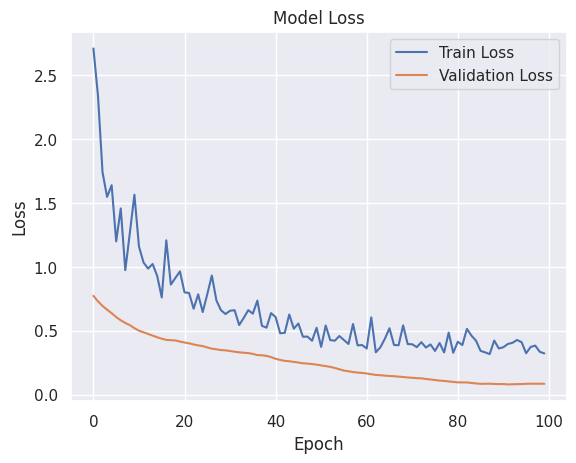

In [86]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
# Train the model
model.fit(X_train1, y_train1, epochs=100, batch_size=64, validation_data=(X_val1, y_val1), verbose=2)

Epoch 1/100
3/3 - 0s - 40ms/step - loss: 0.3172 - val_loss: 0.0787
Epoch 2/100
3/3 - 0s - 35ms/step - loss: 0.3438 - val_loss: 0.0776
Epoch 3/100
3/3 - 0s - 22ms/step - loss: 0.2775 - val_loss: 0.0761
Epoch 4/100
3/3 - 0s - 47ms/step - loss: 0.3408 - val_loss: 0.0746
Epoch 5/100
3/3 - 0s - 47ms/step - loss: 0.3267 - val_loss: 0.0739
Epoch 6/100
3/3 - 0s - 21ms/step - loss: 0.3047 - val_loss: 0.0727
Epoch 7/100
3/3 - 0s - 21ms/step - loss: 0.3103 - val_loss: 0.0713
Epoch 8/100
3/3 - 0s - 46ms/step - loss: 0.2422 - val_loss: 0.0708
Epoch 9/100
3/3 - 0s - 21ms/step - loss: 0.2694 - val_loss: 0.0696
Epoch 10/100
3/3 - 0s - 22ms/step - loss: 0.2768 - val_loss: 0.0684
Epoch 11/100
3/3 - 0s - 22ms/step - loss: 0.3693 - val_loss: 0.0674
Epoch 12/100
3/3 - 0s - 47ms/step - loss: 0.2653 - val_loss: 0.0661
Epoch 13/100
3/3 - 0s - 22ms/step - loss: 0.3417 - val_loss: 0.0650
Epoch 14/100
3/3 - 0s - 22ms/step - loss: 0.2998 - val_loss: 0.0641
Epoch 15/100
3/3 - 0s - 22ms/step - loss: 0.3001 - val_lo

In [71]:
# # Make predictions on the test data
# predictions = model.predict(X_test1)

# # Inverse transform the predictions
# predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# # Inverse transform the actual values
# actual_values = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# # Plot actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(actual_values, label='Actual')
# plt.plot(predicted_values, label='Predicted')
# plt.title('Actual vs. Predicted Quantity')
# plt.xlabel('time')
# plt.ylabel('Quantity')
# plt.legend()
# plt.show()


In [88]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on test data
y_pred = model.predict(X_test1)

# Transform predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
print('Mean Squared Error (Test Accuracy):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Mean Squared Error (Test Accuracy): 3.119316028839121
Mean Absolute Error (MAE): 1.409844909132573
Root Mean Squared Error (RMSE): 1.7661585514440998


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


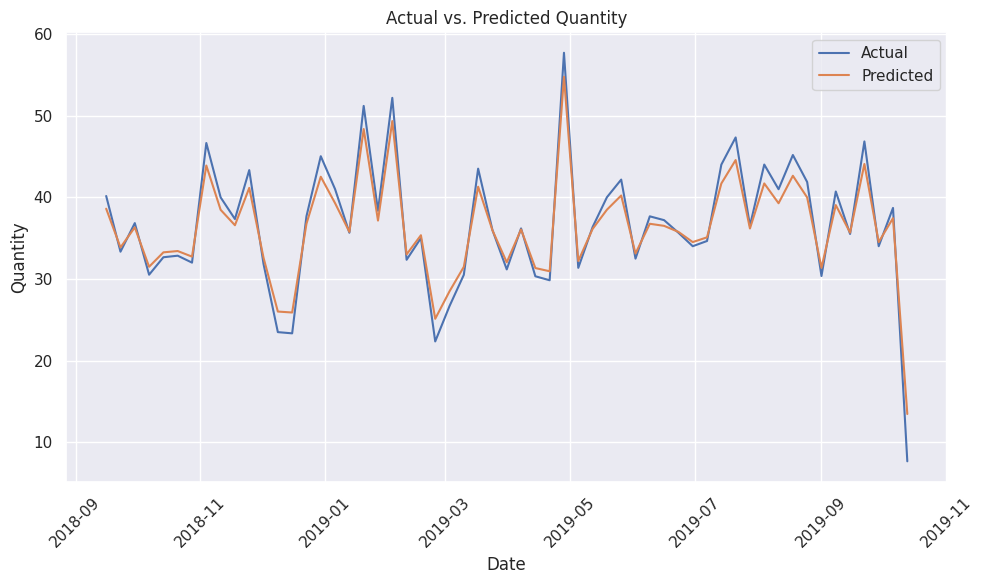

In [89]:
# Make predictions on the test data
predictions = model.predict(X_test1)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test1['datum'], actual_values, label='Actual')
plt.plot(test1['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

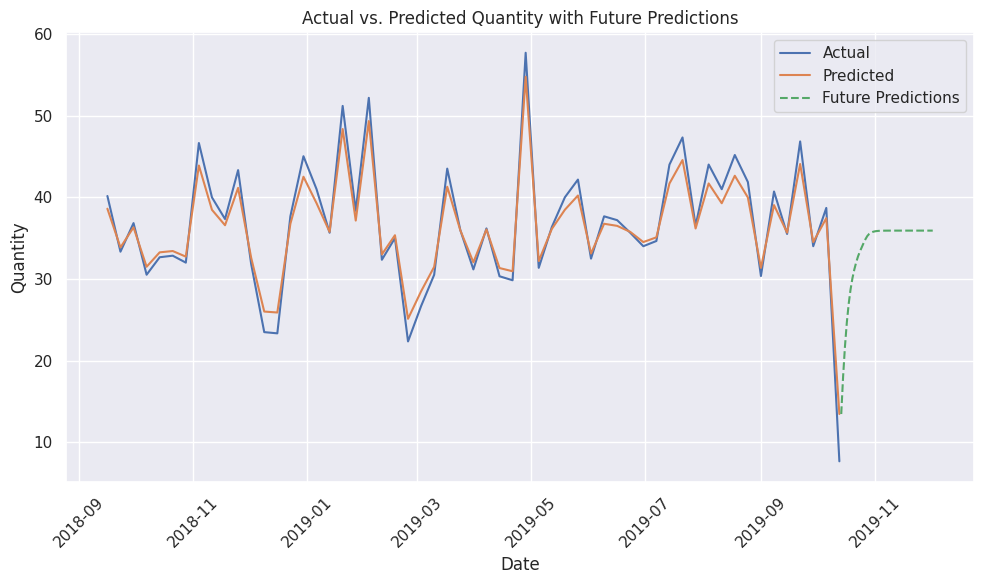

In [90]:
# Number of future time steps to predict
future_steps = 50  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test1[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test1['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test1['datum'], actual_values, label='Actual')
plt.plot(test1['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

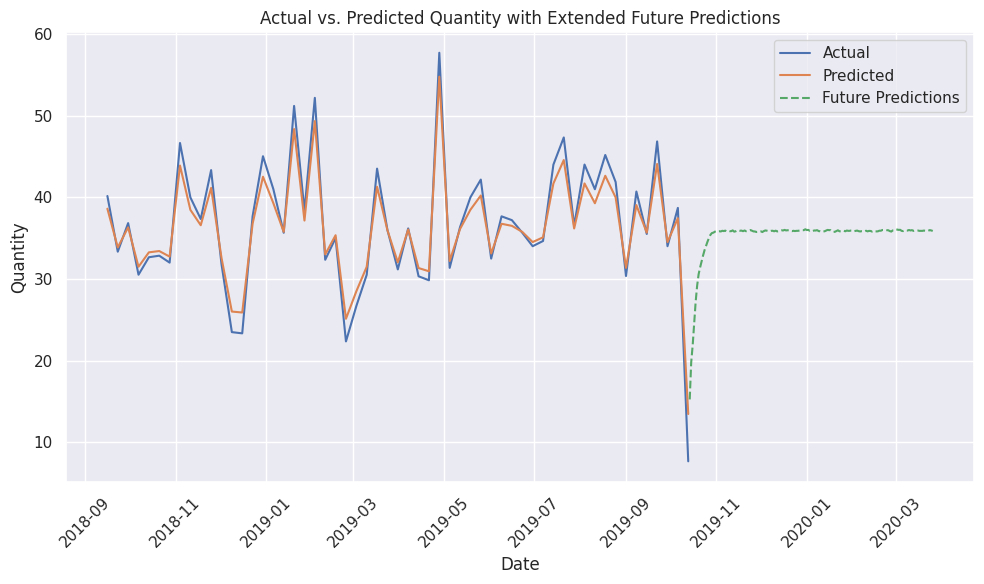

In [91]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test1[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test1['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test1['datum'], actual_values, label='Actual')
plt.plot(test1['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [92]:
from tensorflow.keras.models import load_model
model.save('/kaggle/working/tsf.h5')
model.save("model.h5")

# M01AE

In [64]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [65]:
# Splitting data into train and test sets
split_index = 245
train2 = df_new2.iloc[:split_index]
test2 = df_new2.iloc[split_index:]

In [66]:
X_train2 = train2.drop(['datum'], axis=1).values
y_train2 = train2['Quantity'].values
X_test2 = test2.drop(['datum'], axis=1).values
y_test2 = test2['Quantity'].values

In [67]:
# Standardize features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [68]:
# Normalize target variable
scaler_y = StandardScaler()
y_train2 = scaler_y.fit_transform(y_train2.reshape(-1, 1)).flatten()
y_test2 = scaler_y.transform(y_test2.reshape(-1, 1)).flatten()

In [69]:
# Split the data
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.3, random_state=42)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train2.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [71]:
# Compile the model
model2.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model2.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.0691 - val_loss: 1.3524
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4834 - val_loss: 1.2906
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7156 - val_loss: 1.2321
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3517 - val_loss: 1.1711
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9009 - val_loss: 1.1212
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6845 - val_loss: 1.0744
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5184 - val_loss: 1.0399
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7078 - val_loss: 1.0119
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5193 - val_loss: 0.9738
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5008 - val_loss: 0.9502
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7026 - val_loss: 0.9326
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6660 - val_loss: 0.

In [72]:
# Evaluate the model
train_loss2 = model2.evaluate(X_train2, y_train2, verbose=0)
val_loss2 = model2.evaluate(X_val2, y_val2, verbose=0)
print('Train Loss:', train_loss2)
print('Validation Loss:', val_loss2)

Train Loss: 0.1069943904876709
Validation Loss: 0.1097177267074585


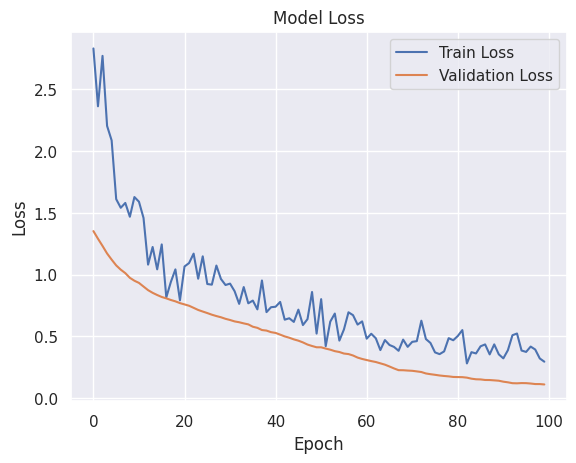

In [73]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
# Train the model
model2.fit(X_train2, y_train2, epochs=100, batch_size=64, validation_data=(X_val2, y_val2), verbose=2)

Epoch 1/100
3/3 - 0s - 39ms/step - loss: 0.3820 - val_loss: 0.1021
Epoch 2/100
3/3 - 0s - 29ms/step - loss: 0.3390 - val_loss: 0.1010
Epoch 3/100
3/3 - 0s - 46ms/step - loss: 0.3373 - val_loss: 0.0998
Epoch 4/100
3/3 - 0s - 23ms/step - loss: 0.3109 - val_loss: 0.0992
Epoch 5/100
3/3 - 0s - 21ms/step - loss: 0.3604 - val_loss: 0.0983
Epoch 6/100
3/3 - 0s - 22ms/step - loss: 0.4097 - val_loss: 0.0954
Epoch 7/100
3/3 - 0s - 22ms/step - loss: 0.2226 - val_loss: 0.0928
Epoch 8/100
3/3 - 0s - 22ms/step - loss: 0.2959 - val_loss: 0.0913
Epoch 9/100
3/3 - 0s - 21ms/step - loss: 0.3262 - val_loss: 0.0899
Epoch 10/100
3/3 - 0s - 47ms/step - loss: 0.3349 - val_loss: 0.0878
Epoch 11/100
3/3 - 0s - 21ms/step - loss: 0.4109 - val_loss: 0.0863
Epoch 12/100
3/3 - 0s - 22ms/step - loss: 0.3280 - val_loss: 0.0852
Epoch 13/100
3/3 - 0s - 46ms/step - loss: 0.3004 - val_loss: 0.0847
Epoch 14/100
3/3 - 0s - 46ms/step - loss: 0.3517 - val_loss: 0.0841
Epoch 15/100
3/3 - 0s - 21ms/step - loss: 0.3019 - val_lo

In [75]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on test data
y_pred = model2.predict(X_test2)

# Transform predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test2.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
print('Mean Squared Error (Test Accuracy):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Mean Squared Error (Test Accuracy): 3.6796166540455935
Mean Absolute Error (MAE): 1.5852879686857526
Root Mean Squared Error (RMSE): 1.9182326902765456


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


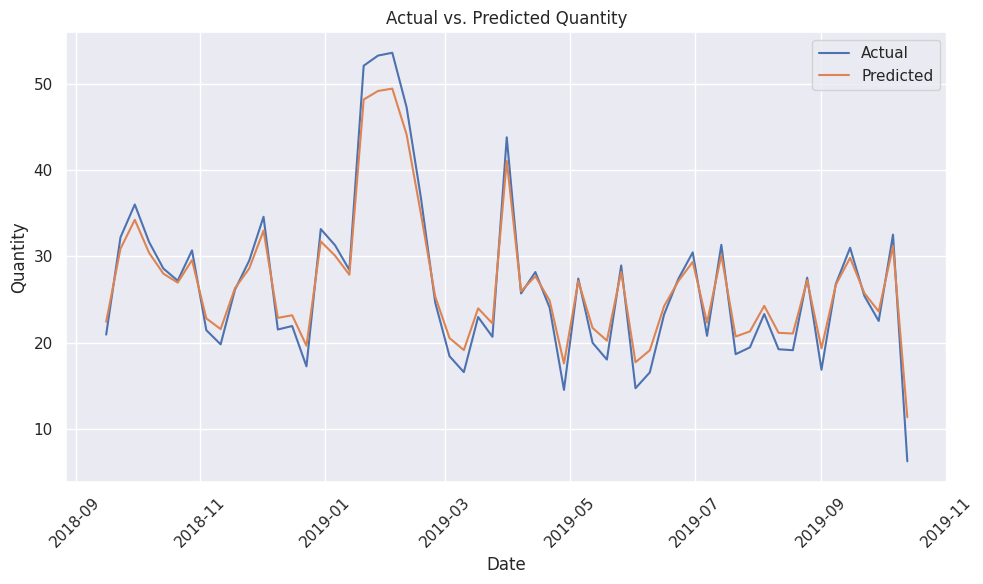

In [76]:
# Make predictions on the test data
predictions = model2.predict(X_test2)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test2.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test2['datum'], actual_values, label='Actual')
plt.plot(test2['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

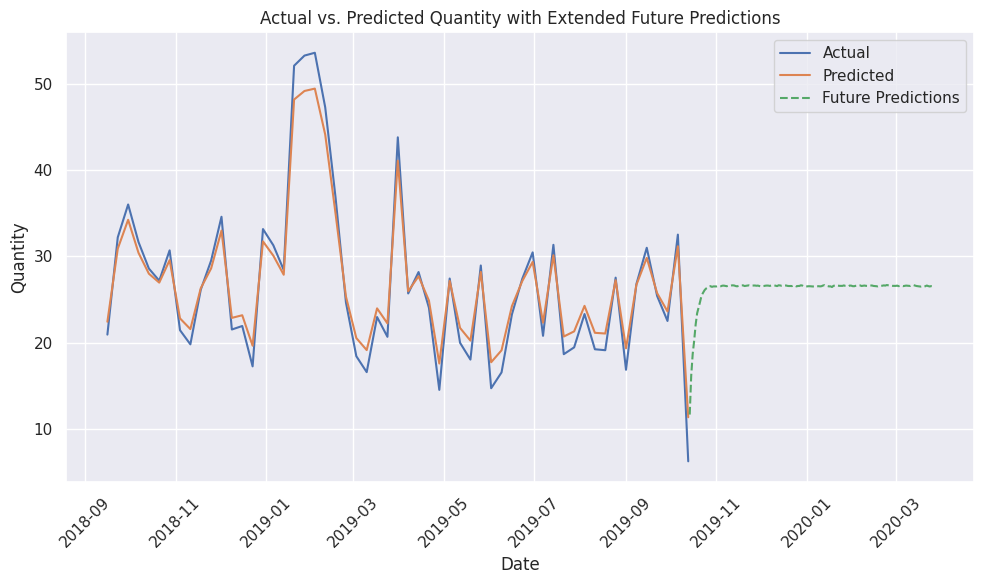

In [78]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test2[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model2.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test1['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test1['datum'], actual_values, label='Actual')
plt.plot(test1['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [79]:
from tensorflow.keras.models import load_model
model2.save('/kaggle/working/tsf2.h5')
model2.save("model2.h5")

## N02BA

In [93]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [94]:
# Splitting data into train and test sets
split_index = 240
train3 = df_new3.iloc[:split_index]
test3 = df_new3.iloc[split_index:]

In [95]:
X_train3 = train3.drop(['datum'], axis=1).values
y_train3 = train3['Quantity'].values
X_test3 = test3.drop(['datum'], axis=1).values
y_test3 = test3['Quantity'].values

In [96]:
# Standardize features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [97]:
# Normalize target variable
scaler_y = StandardScaler()
y_train3 = scaler_y.fit_transform(y_train3.reshape(-1, 1)).flatten()
y_test3 = scaler_y.transform(y_test3.reshape(-1, 1)).flatten()

In [98]:
# Split the data
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.3, random_state=42)

In [99]:
from keras import regularizers

def create_ann_model(input_shape, n_units=256, n_layers=3, dropout_rate=0.3, l2_reg=0.01):
    model3 = Sequential()
    # Reshape input data
    model3.add(Flatten(input_shape=input_shape))
    # Add dense layers
    for i in range(n_layers):
        model3.add(Dense(units=n_units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
        model3.add(BatchNormalization())
        model3.add(Dropout(dropout_rate))
    model3.add(Dense(1))  # Output layer
    return model

# Create the ANN model
n_features = X_train3.shape[1]
input_shape = (n_features, 1)
model3 = create_ann_model(input_shape)
model3.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,309 (9.02 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 1,476 (5.77 KB)

In [100]:
# Compile the model
model3.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model3.fit(X_train3, y_train3, epochs=100, batch_size=32, validation_data=(X_val3, y_val3))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2777 - val_loss: 0.0791
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2606 - val_loss: 0.0841
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2570 - val_loss: 0.0926
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2211 - val_loss: 0.1007
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3190 - val_loss: 0.1050
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2355 - val_loss: 0.1100
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3853 - val_loss: 0.1083
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3349 - val_loss: 0.1090
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2485 - val_loss: 0.1058
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2478 - val_loss: 0.1035
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3430 - val_loss: 0.1015
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2726 - val_loss: 

In [101]:
# Evaluate the model
train_loss3 = model3.evaluate(X_train3, y_train3, verbose=0)
val_loss3 = model3.evaluate(X_val3, y_val3, verbose=0)
print('Train Loss:', train_loss3)
print('Validation Loss:', val_loss3)

Train Loss: 0.07152846455574036
Validation Loss: 0.07589855045080185


In [102]:
# Train the model
model3.fit(X_train3, y_train3, epochs=100, batch_size=64, validation_data=(X_val3, y_val3), verbose=2)

Epoch 1/100
3/3 - 0s - 42ms/step - loss: 0.2556 - val_loss: 0.0769
Epoch 2/100
3/3 - 0s - 22ms/step - loss: 0.1929 - val_loss: 0.0755
Epoch 3/100
3/3 - 0s - 47ms/step - loss: 0.2038 - val_loss: 0.0742
Epoch 4/100
3/3 - 0s - 21ms/step - loss: 0.2163 - val_loss: 0.0719
Epoch 5/100
3/3 - 0s - 24ms/step - loss: 0.2246 - val_loss: 0.0702
Epoch 6/100
3/3 - 0s - 44ms/step - loss: 0.2335 - val_loss: 0.0658
Epoch 7/100
3/3 - 0s - 47ms/step - loss: 0.2572 - val_loss: 0.0616
Epoch 8/100
3/3 - 0s - 20ms/step - loss: 0.2680 - val_loss: 0.0601
Epoch 9/100
3/3 - 0s - 47ms/step - loss: 0.1718 - val_loss: 0.0571
Epoch 10/100
3/3 - 0s - 21ms/step - loss: 0.2204 - val_loss: 0.0559
Epoch 11/100
3/3 - 0s - 20ms/step - loss: 0.2062 - val_loss: 0.0549
Epoch 12/100
3/3 - 0s - 21ms/step - loss: 0.2326 - val_loss: 0.0539
Epoch 13/100
3/3 - 0s - 46ms/step - loss: 0.3239 - val_loss: 0.0523
Epoch 14/100
3/3 - 0s - 20ms/step - loss: 0.2091 - val_loss: 0.0507
Epoch 15/100
3/3 - 0s - 20ms/step - loss: 0.2319 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


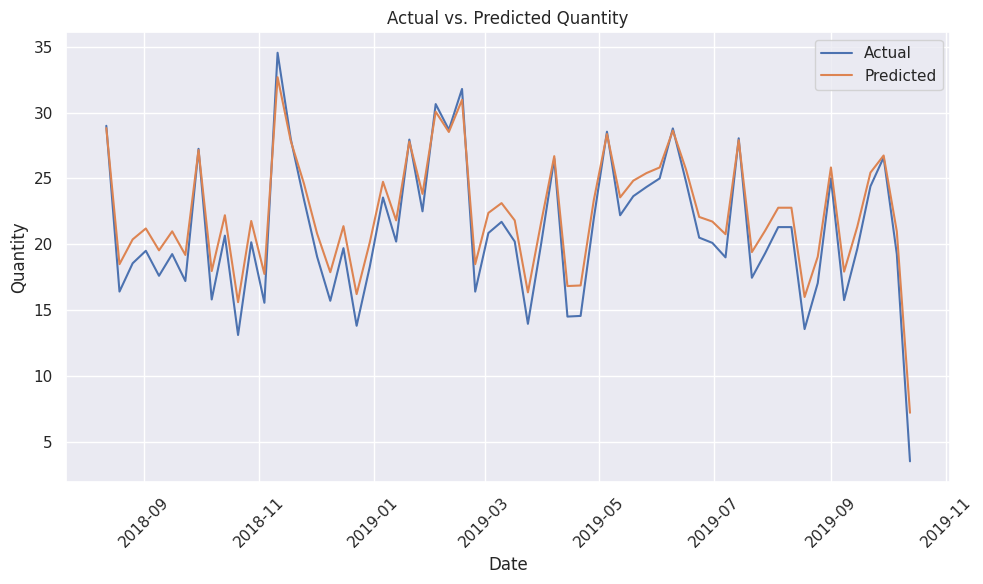

In [103]:
# Make predictions on the test data
predictions = model3.predict(X_test3)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test3.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test3['datum'], actual_values, label='Actual')
plt.plot(test3['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

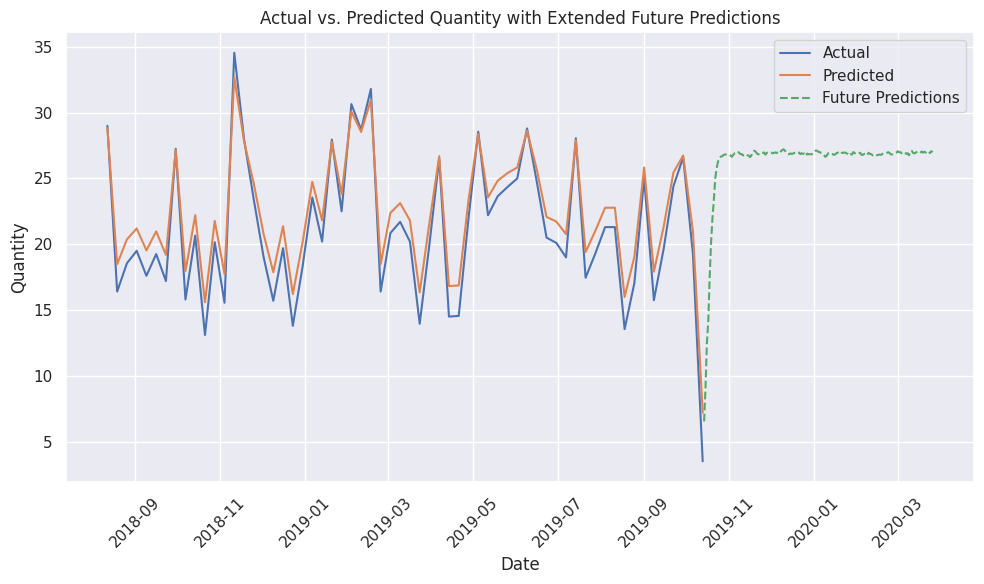

In [104]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test3[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model3.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test3['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test3['datum'], actual_values, label='Actual')
plt.plot(test3['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [105]:
from tensorflow.keras.models import load_model
model3.save('/kaggle/working/tsf3.h5')
model3.save("model3.h5")

## N02BE

In [106]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [107]:
# Splitting data into train and test sets
split_index = 245
train4 = df_new4.iloc[:split_index]
test4 = df_new4.iloc[split_index:]

In [108]:
X_train4 = train4.drop(['datum'], axis=1).values
y_train4 = train4['Quantity'].values
X_test4 = test4.drop(['datum'], axis=1).values
y_test4 = test4['Quantity'].values

In [109]:
# Standardize features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [110]:
# Normalize target variable
scaler_y = StandardScaler()
y_train4 = scaler_y.fit_transform(y_train4.reshape(-1, 1)).flatten()
y_test4 = scaler_y.transform(y_test4.reshape(-1, 1)).flatten()

In [111]:
# Split the data
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=0.3, random_state=42)

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model4 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train4.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [113]:
# Compile the model
model4.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model4.fit(X_train4, y_train4, epochs=100, batch_size=32, validation_data=(X_val4, y_val4))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.0699 - val_loss: 0.8150
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9472 - val_loss: 0.7716
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4509 - val_loss: 0.7518
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.5004 - val_loss: 0.7479
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5400 - val_loss: 0.7403
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1422 - val_loss: 0.7360
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3122 - val_loss: 0.7319
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4151 - val_loss: 0.7427
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2611 - val_loss: 0.7254
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2929 - val_loss: 0.7108
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0720 - val_loss: 0.7091
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6984 - val_loss: 0.7

In [114]:
# Evaluate the model
train_loss4 = model4.evaluate(X_train4, y_train4, verbose=0)
val_loss4 = model4.evaluate(X_val4, y_val4, verbose=0)
print('Train Loss:', train_loss4)
print('Validation Loss:', val_loss4)

Train Loss: 0.10872019082307816
Validation Loss: 0.11906953901052475


In [115]:
# Train the model
model4.fit(X_train4, y_train4, epochs=100, batch_size=64, validation_data=(X_val4, y_val4), verbose=2)

Epoch 1/100
3/3 - 0s - 39ms/step - loss: 0.4183 - val_loss: 0.1184
Epoch 2/100
3/3 - 0s - 25ms/step - loss: 0.3872 - val_loss: 0.1165
Epoch 3/100
3/3 - 0s - 41ms/step - loss: 0.3212 - val_loss: 0.1155
Epoch 4/100
3/3 - 0s - 47ms/step - loss: 0.2598 - val_loss: 0.1136
Epoch 5/100
3/3 - 0s - 21ms/step - loss: 0.4384 - val_loss: 0.1110
Epoch 6/100
3/3 - 0s - 20ms/step - loss: 0.4300 - val_loss: 0.1086
Epoch 7/100
3/3 - 0s - 19ms/step - loss: 0.5098 - val_loss: 0.1059
Epoch 8/100
3/3 - 0s - 21ms/step - loss: 0.3776 - val_loss: 0.1056
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 0.3599 - val_loss: 0.1067
Epoch 10/100
3/3 - 0s - 20ms/step - loss: 0.3086 - val_loss: 0.1072
Epoch 11/100
3/3 - 0s - 20ms/step - loss: 0.4217 - val_loss: 0.1069
Epoch 12/100
3/3 - 0s - 21ms/step - loss: 0.3389 - val_loss: 0.1048
Epoch 13/100
3/3 - 0s - 21ms/step - loss: 0.4221 - val_loss: 0.1032
Epoch 14/100
3/3 - 0s - 19ms/step - loss: 0.3991 - val_loss: 0.1016
Epoch 15/100
3/3 - 0s - 20ms/step - loss: 0.3932 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


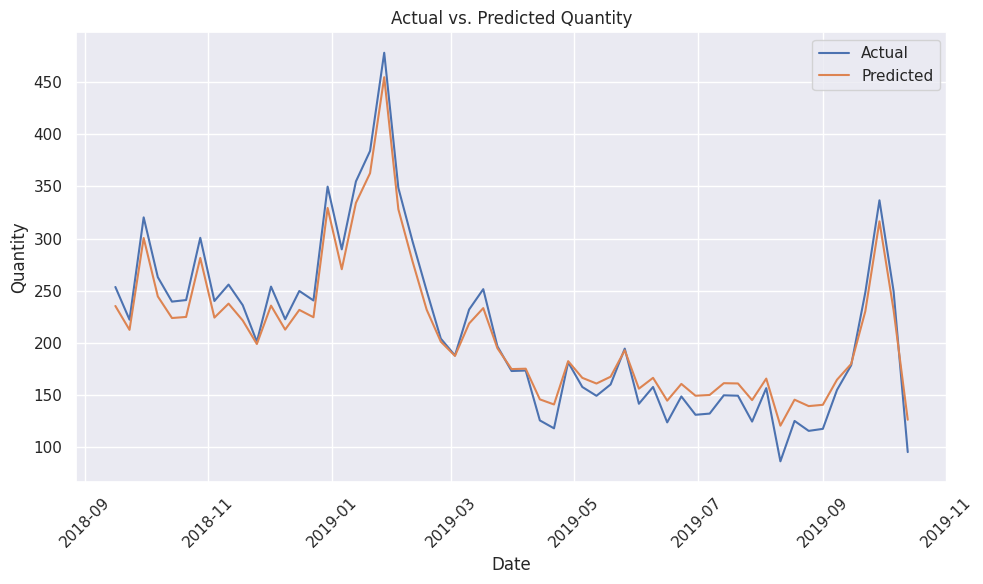

In [116]:
# Make predictions on the test data
predictions = model4.predict(X_test4)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test4.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test4['datum'], actual_values, label='Actual')
plt.plot(test4['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

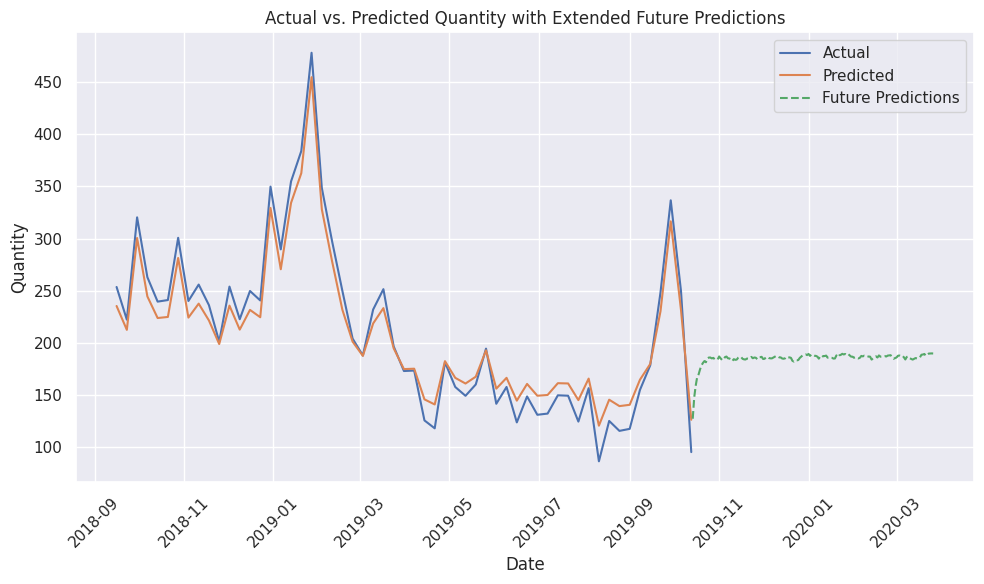

In [117]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test4[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model4.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test4['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test4['datum'], actual_values, label='Actual')
plt.plot(test4['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [118]:
from tensorflow.keras.models import load_model
model4.save('/kaggle/working/tsf4.h5')
model4.save("model4.h5")

## N05B

In [119]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [120]:
# Splitting data into train and test sets
split_index = 245
train5 = df_new5.iloc[:split_index]
test5 = df_new5.iloc[split_index:]

In [121]:
X_train5 = train5.drop(['datum'], axis=1).values
y_train5 = train5['Quantity'].values
X_test5 = test5.drop(['datum'], axis=1).values
y_test5 = test5['Quantity'].values

In [122]:
# Standardize features
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

In [123]:
# Normalize target variable
scaler_y = StandardScaler()
y_train5 = scaler_y.fit_transform(y_train5.reshape(-1, 1)).flatten()
y_test5 = scaler_y.transform(y_test5.reshape(-1, 1)).flatten()

In [124]:
# Split the data
X_train5, X_val5, y_train5, y_val5 = train_test_split(X_train5, y_train5, test_size=0.3, random_state=42)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model5 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train5.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [126]:
# Compile the model
model5.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model5.fit(X_train5, y_train5, epochs=100, batch_size=32, validation_data=(X_val5, y_val5))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.2129 - val_loss: 1.0597
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9936 - val_loss: 0.9883
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7988 - val_loss: 0.9315
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3491 - val_loss: 0.8851
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1858 - val_loss: 0.8451
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3567 - val_loss: 0.8045
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3980 - val_loss: 0.7713
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6096 - val_loss: 0.7436
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5405 - val_loss: 0.7279
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9959 - val_loss: 0.7236
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4920 - val_loss: 0.7100
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5756 - val_loss: 0.

In [127]:
# Evaluate the model
train_loss5 = model5.evaluate(X_train5, y_train5, verbose=0)
val_loss5 = model5.evaluate(X_val5, y_val5, verbose=0)
print('Train Loss:', train_loss5)
print('Validation Loss:', val_loss5)

Train Loss: 0.10601872950792313
Validation Loss: 0.10696306824684143


In [128]:
# Train the model
model5.fit(X_train5, y_train5, epochs=100, batch_size=64, validation_data=(X_val5, y_val5), verbose=2)

Epoch 1/100
3/3 - 0s - 37ms/step - loss: 0.3298 - val_loss: 0.1027
Epoch 2/100
3/3 - 0s - 27ms/step - loss: 0.3792 - val_loss: 0.1029
Epoch 3/100
3/3 - 0s - 20ms/step - loss: 0.3353 - val_loss: 0.1030
Epoch 4/100
3/3 - 0s - 20ms/step - loss: 0.3536 - val_loss: 0.1018
Epoch 5/100
3/3 - 0s - 20ms/step - loss: 0.3104 - val_loss: 0.1019
Epoch 6/100
3/3 - 0s - 53ms/step - loss: 0.3486 - val_loss: 0.1004
Epoch 7/100
3/3 - 0s - 20ms/step - loss: 0.3519 - val_loss: 0.0985
Epoch 8/100
3/3 - 0s - 19ms/step - loss: 0.3821 - val_loss: 0.0963
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 0.2905 - val_loss: 0.0957
Epoch 10/100
3/3 - 0s - 47ms/step - loss: 0.3284 - val_loss: 0.0945
Epoch 11/100
3/3 - 0s - 46ms/step - loss: 0.3542 - val_loss: 0.0932
Epoch 12/100
3/3 - 0s - 25ms/step - loss: 0.3094 - val_loss: 0.0924
Epoch 13/100
3/3 - 0s - 42ms/step - loss: 0.3365 - val_loss: 0.0915
Epoch 14/100
3/3 - 0s - 21ms/step - loss: 0.3635 - val_loss: 0.0910
Epoch 15/100
3/3 - 0s - 47ms/step - loss: 0.3113 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


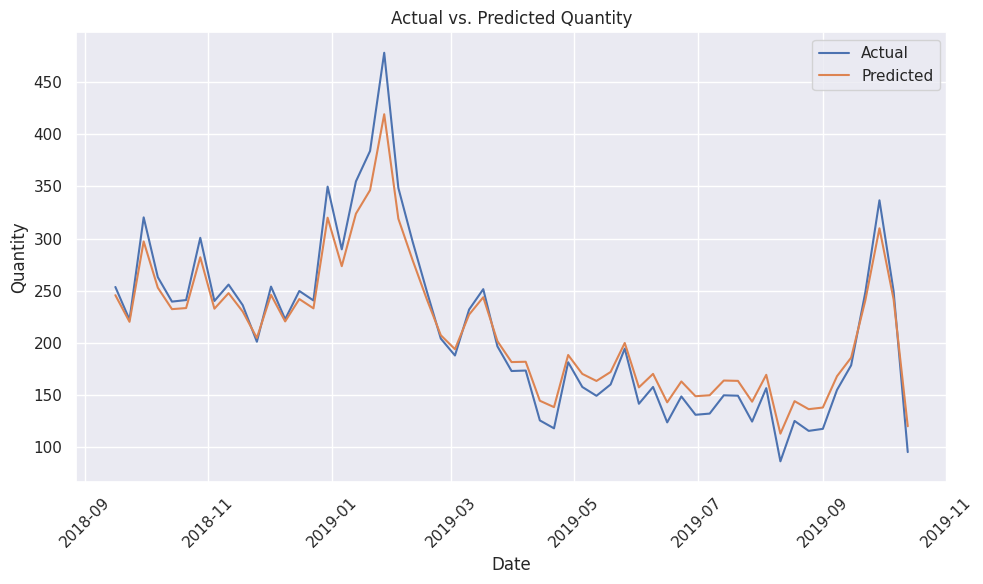

In [129]:
# Make predictions on the test data
predictions = model5.predict(X_test5)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test5.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test5['datum'], actual_values, label='Actual')
plt.plot(test5['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

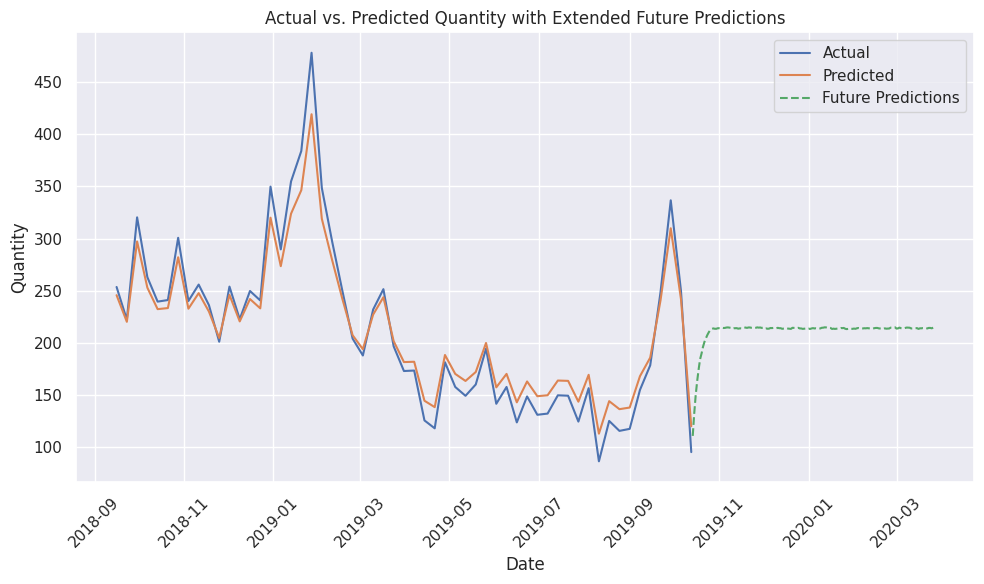

In [133]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test5[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model5.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[0] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test5['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test5['datum'], actual_values, label='Actual')
plt.plot(test5['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [147]:
from tensorflow.keras.models import load_model
model5.save('/kaggle/working/tsf5.h5')
model5.save("model5.h5")

## N05C

In [134]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [135]:
# Splitting data into train and test sets
split_index = 245
train6 = df_new6.iloc[:split_index]
test6 = df_new6.iloc[split_index:]

In [136]:
X_train6 = train6.drop(['datum'], axis=1).values
y_train6 = train6['Quantity'].values
X_test6 = test6.drop(['datum'], axis=1).values
y_test6 = test6['Quantity'].values

In [137]:
# Standardize features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train6)
X_test6 = scaler.transform(X_test6)

In [138]:
# Normalize target variable
scaler_y = StandardScaler()
y_train6 = scaler_y.fit_transform(y_train6.reshape(-1, 1)).flatten()
y_test6 = scaler_y.transform(y_test6.reshape(-1, 1)).flatten()

In [139]:
# Split the data
X_train6, X_val6, y_train6, y_val6 = train_test_split(X_train6, y_train6, test_size=0.3, random_state=42)

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model6 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train6.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [141]:
# Compile the model
model6.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model6.fit(X_train6, y_train6, epochs=100, batch_size=32, validation_data=(X_val6, y_val6))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 2.7809 - val_loss: 1.2271
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5232 - val_loss: 1.1598
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8535 - val_loss: 1.0939
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6007 - val_loss: 1.0449
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4575 - val_loss: 1.0030
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2957 - val_loss: 0.9671
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6429 - val_loss: 0.9411
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4120 - val_loss: 0.9200
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0403 - val_loss: 0.9030
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2623 - val_loss: 0.8807
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1000 - val_loss: 0.8505
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7527 - val_loss: 0.

In [142]:
# Evaluate the model
train_loss6 = model6.evaluate(X_train6, y_train6, verbose=0)
val_loss6 = model6.evaluate(X_val6, y_val6, verbose=0)
print('Train Loss:', train_loss6)
print('Validation Loss:', val_loss6)

Train Loss: 0.1135430708527565
Validation Loss: 0.11567109823226929


In [143]:
# Train the model
model6.fit(X_train6, y_train6, epochs=100, batch_size=64, validation_data=(X_val6, y_val6), verbose=2)

Epoch 1/100
3/3 - 0s - 43ms/step - loss: 0.3759 - val_loss: 0.1321
Epoch 2/100
3/3 - 0s - 19ms/step - loss: 0.2754 - val_loss: 0.1350
Epoch 3/100
3/3 - 0s - 20ms/step - loss: 0.4110 - val_loss: 0.1343
Epoch 4/100
3/3 - 0s - 20ms/step - loss: 0.3638 - val_loss: 0.1321
Epoch 5/100
3/3 - 0s - 21ms/step - loss: 0.2718 - val_loss: 0.1308
Epoch 6/100
3/3 - 0s - 20ms/step - loss: 0.3929 - val_loss: 0.1268
Epoch 7/100
3/3 - 0s - 52ms/step - loss: 0.3106 - val_loss: 0.1243
Epoch 8/100
3/3 - 0s - 42ms/step - loss: 0.2571 - val_loss: 0.1245
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 0.2926 - val_loss: 0.1221
Epoch 10/100
3/3 - 0s - 20ms/step - loss: 0.3052 - val_loss: 0.1182
Epoch 11/100
3/3 - 0s - 21ms/step - loss: 0.3726 - val_loss: 0.1143
Epoch 12/100
3/3 - 0s - 47ms/step - loss: 0.2610 - val_loss: 0.1138
Epoch 13/100
3/3 - 0s - 21ms/step - loss: 0.3343 - val_loss: 0.1108
Epoch 14/100
3/3 - 0s - 46ms/step - loss: 0.3332 - val_loss: 0.1087
Epoch 15/100
3/3 - 0s - 47ms/step - loss: 0.3804 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


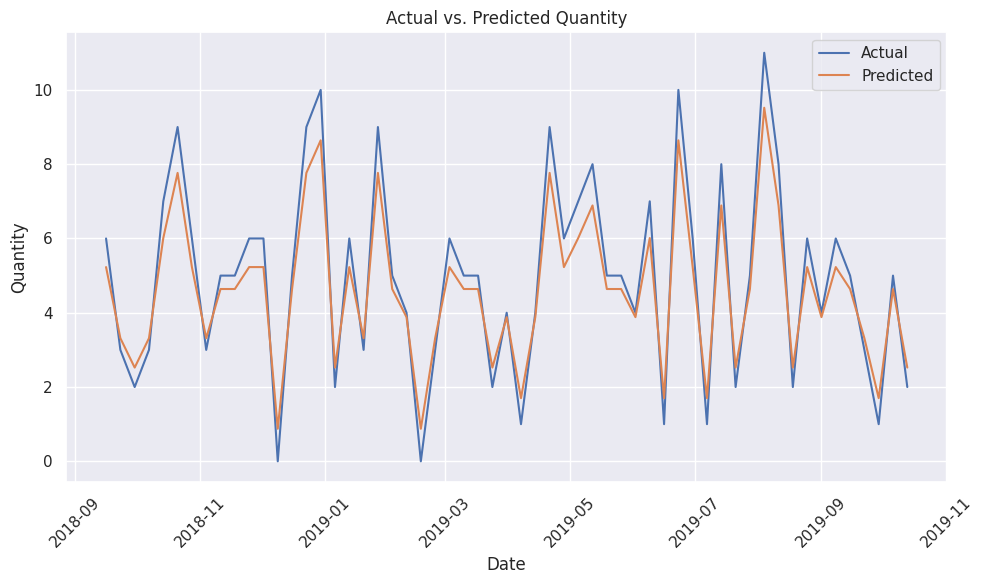

In [144]:
# Make predictions on the test data
predictions = model6.predict(X_test6)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test6.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test6['datum'], actual_values, label='Actual')
plt.plot(test6['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

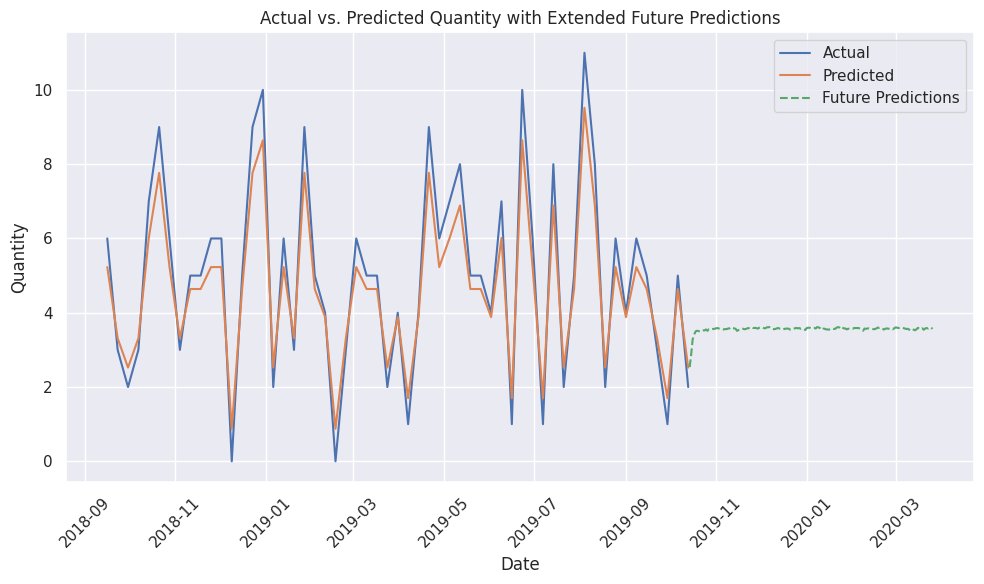

In [145]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test6[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model6.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test6['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test6['datum'], actual_values, label='Actual')
plt.plot(test6['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [146]:
from tensorflow.keras.models import load_model
model6.save('/kaggle/working/tsf6.h5')
model6.save("model6.h5")

## R03

In [148]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [149]:
# Splitting data into train and test sets
split_index = 245
train7 = df_new7.iloc[:split_index]
test7 = df_new7.iloc[split_index:]

In [150]:
X_train7 = train7.drop(['datum'], axis=1).values
y_train7 = train7['Quantity'].values
X_test7 = test7.drop(['datum'], axis=1).values
y_test7 = test7['Quantity'].values

In [151]:
# Standardize features
scaler = StandardScaler()
X_train7 = scaler.fit_transform(X_train7)
X_test7 = scaler.transform(X_test7)

In [152]:
# Normalize target variable
scaler_y = StandardScaler()
y_train7 = scaler_y.fit_transform(y_train7.reshape(-1, 1)).flatten()
y_test7 = scaler_y.transform(y_test7.reshape(-1, 1)).flatten()

In [153]:
# Split the data
X_train7, X_val7, y_train7, y_val7 = train_test_split(X_train7, y_train7, test_size=0.3, random_state=42)

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model7 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train7.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [155]:
# Compile the model
model7.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model7.fit(X_train7, y_train7, epochs=100, batch_size=32, validation_data=(X_val7, y_val7))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.0649 - val_loss: 1.2823
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2071 - val_loss: 1.2102
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3967 - val_loss: 1.1609
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6541 - val_loss: 1.1159
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1986 - val_loss: 1.0715
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3189 - val_loss: 1.0321
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1282 - val_loss: 1.0017
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0983 - val_loss: 0.9755
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6052 - val_loss: 0.9646
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3361 - val_loss: 0.9595
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8287 - val_loss: 0.9536
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5423 - val_loss: 0

In [156]:
# Evaluate the model
train_loss7 = model7.evaluate(X_train7, y_train7, verbose=0)
val_loss7 = model7.evaluate(X_val7, y_val7, verbose=0)
print('Train Loss:', train_loss7)
print('Validation Loss:', val_loss7)

Train Loss: 0.07829558104276657
Validation Loss: 0.10784220695495605


In [157]:
# Train the model
model7.fit(X_train7, y_train7, epochs=100, batch_size=64, validation_data=(X_val7, y_val7), verbose=2)

Epoch 1/100
3/3 - 0s - 39ms/step - loss: 0.3839 - val_loss: 0.1153
Epoch 2/100
3/3 - 0s - 20ms/step - loss: 0.4085 - val_loss: 0.1139
Epoch 3/100
3/3 - 0s - 19ms/step - loss: 0.2574 - val_loss: 0.1145
Epoch 4/100
3/3 - 0s - 21ms/step - loss: 0.3933 - val_loss: 0.1142
Epoch 5/100
3/3 - 0s - 20ms/step - loss: 0.3565 - val_loss: 0.1130
Epoch 6/100
3/3 - 0s - 19ms/step - loss: 0.3600 - val_loss: 0.1115
Epoch 7/100
3/3 - 0s - 20ms/step - loss: 0.2702 - val_loss: 0.1115
Epoch 8/100
3/3 - 0s - 20ms/step - loss: 0.4074 - val_loss: 0.1091
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 0.3760 - val_loss: 0.1083
Epoch 10/100
3/3 - 0s - 20ms/step - loss: 0.2937 - val_loss: 0.1078
Epoch 11/100
3/3 - 0s - 46ms/step - loss: 0.3877 - val_loss: 0.1061
Epoch 12/100
3/3 - 0s - 20ms/step - loss: 0.3256 - val_loss: 0.1059
Epoch 13/100
3/3 - 0s - 20ms/step - loss: 0.3124 - val_loss: 0.1047
Epoch 14/100
3/3 - 0s - 19ms/step - loss: 0.3736 - val_loss: 0.1035
Epoch 15/100
3/3 - 0s - 21ms/step - loss: 0.3380 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


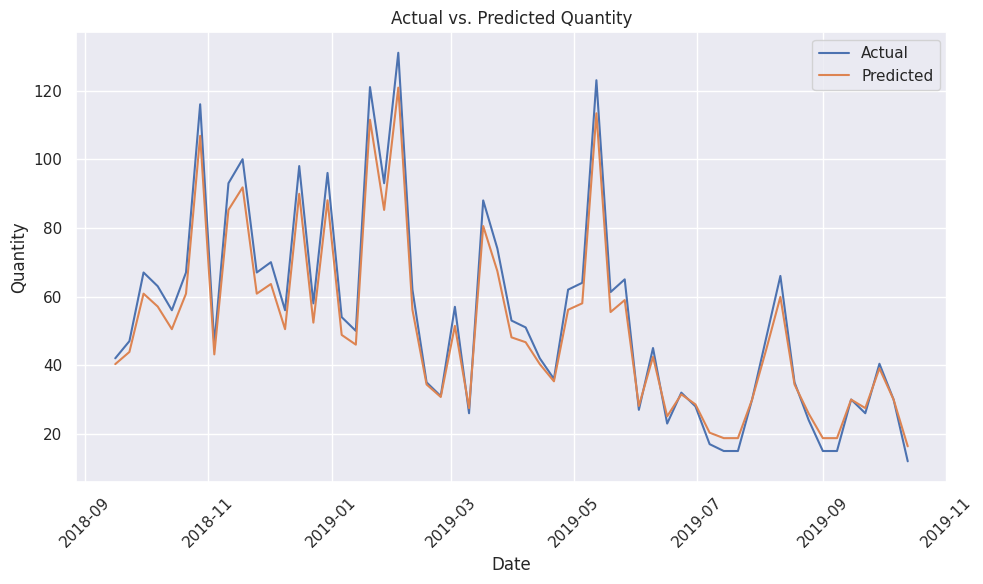

In [158]:
# Make predictions on the test data
predictions = model7.predict(X_test7)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test7.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test7['datum'], actual_values, label='Actual')
plt.plot(test7['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

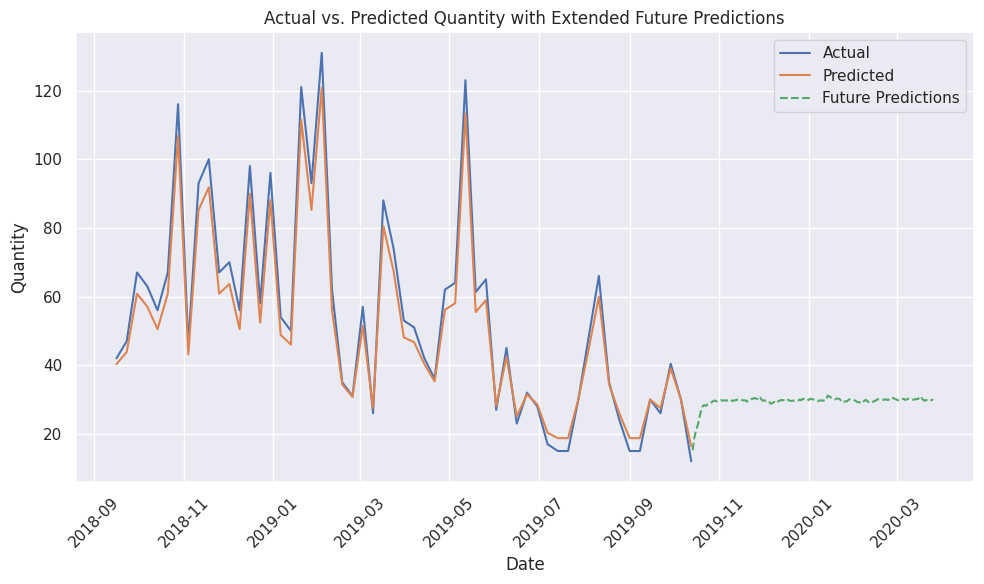

In [159]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test7[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model7.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test7['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test7['datum'], actual_values, label='Actual')
plt.plot(test7['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [160]:
from tensorflow.keras.models import load_model
model7.save('/kaggle/working/tsf7.h5')
model7.save("model7.h5")

## R06

In [161]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [162]:
# Splitting data into train and test sets
split_index = 245
train8 = df_new8.iloc[:split_index]
test8 = df_new8.iloc[split_index:]

In [163]:
X_train8 = train8.drop(['datum'], axis=1).values
y_train8 = train8['Quantity'].values
X_test8 = test8.drop(['datum'], axis=1).values
y_test8 = test8['Quantity'].values

In [164]:
# Standardize features
scaler = StandardScaler()
X_train8 = scaler.fit_transform(X_train8)
X_test8 = scaler.transform(X_test8)

In [165]:
# Normalize target variable
scaler_y = StandardScaler()
y_train8 = scaler_y.fit_transform(y_train8.reshape(-1, 1)).flatten()
y_test8 = scaler_y.transform(y_test8.reshape(-1, 1)).flatten()

In [166]:
# Split the data
X_train8, X_val8, y_train8, y_val8 = train_test_split(X_train8, y_train8, test_size=0.3, random_state=42)

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

model8 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train8.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1)
])


model8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 96 (384.00 B)

In [168]:
# Compile the model
model8.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model8.fit(X_train8, y_train8, epochs=100, batch_size=32, validation_data=(X_val8, y_val8))


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.7047 - val_loss: 1.2827
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9272 - val_loss: 1.2015
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1666 - val_loss: 1.1236
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8536 - val_loss: 1.0645
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7687 - val_loss: 1.0095
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2660 - val_loss: 0.9477
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6783 - val_loss: 0.8695
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0039 - val_loss: 0.8175
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5939 - val_loss: 0.7822
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7783 - val_loss: 0.7201
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5044 - val_loss: 0.6791
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5374 - val_loss: 0.652

In [169]:
# Evaluate the model
train_loss8 = model8.evaluate(X_train8, y_train8, verbose=0)
val_loss8 = model8.evaluate(X_val8, y_val8, verbose=0)
print('Train Loss:', train_loss8)
print('Validation Loss:', val_loss8)

Train Loss: 0.09389040619134903
Validation Loss: 0.09724906831979752


In [170]:
# Train the model
model8.fit(X_train8, y_train8, epochs=100, batch_size=64, validation_data=(X_val8, y_val8), verbose=2)

Epoch 1/100
3/3 - 0s - 39ms/step - loss: 0.5151 - val_loss: 0.0983
Epoch 2/100
3/3 - 0s - 21ms/step - loss: 0.5325 - val_loss: 0.0998
Epoch 3/100
3/3 - 0s - 47ms/step - loss: 0.3483 - val_loss: 0.1011
Epoch 4/100
3/3 - 0s - 46ms/step - loss: 0.3701 - val_loss: 0.1019
Epoch 5/100
3/3 - 0s - 20ms/step - loss: 0.3954 - val_loss: 0.1024
Epoch 6/100
3/3 - 0s - 20ms/step - loss: 0.3406 - val_loss: 0.1017
Epoch 7/100
3/3 - 0s - 20ms/step - loss: 0.3415 - val_loss: 0.0998
Epoch 8/100
3/3 - 0s - 22ms/step - loss: 0.3019 - val_loss: 0.0985
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 0.3738 - val_loss: 0.0968
Epoch 10/100
3/3 - 0s - 20ms/step - loss: 0.3192 - val_loss: 0.0956
Epoch 11/100
3/3 - 0s - 48ms/step - loss: 0.5327 - val_loss: 0.0944
Epoch 12/100
3/3 - 0s - 46ms/step - loss: 0.3511 - val_loss: 0.0933
Epoch 13/100
3/3 - 0s - 47ms/step - loss: 0.3073 - val_loss: 0.0913
Epoch 14/100
3/3 - 0s - 20ms/step - loss: 0.3071 - val_loss: 0.0912
Epoch 15/100
3/3 - 0s - 47ms/step - loss: 0.4782 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


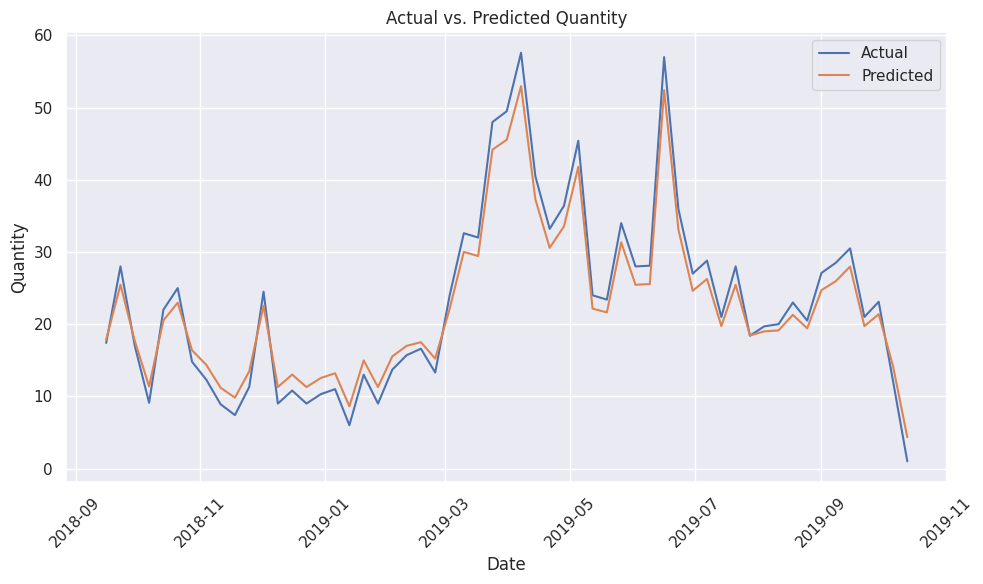

In [171]:
# Make predictions on the test data
predictions = model8.predict(X_test8)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test8.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test8['datum'], actual_values, label='Actual')
plt.plot(test8['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

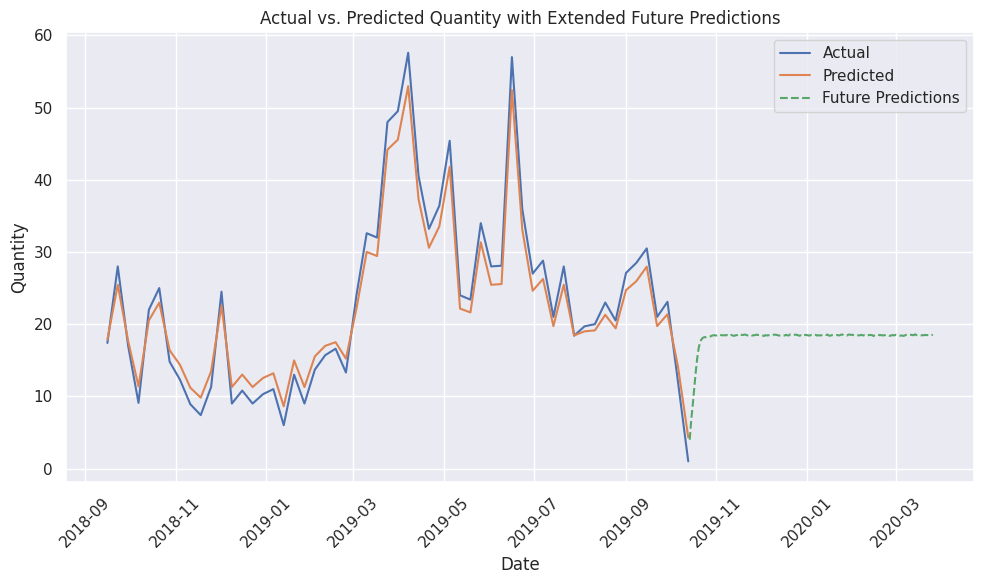

In [172]:
# Number of future time steps to predict (hidden from output)
future_steps = 165

# Prepare the last window of data from the test set to predict future values
last_window = X_test8[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model8.predict(last_window)

    # Introduce variation by adding random noise with adjustable level
    noise_level = 0.05  # Adjust this value for desired variation
    next_pred_with_noise = next_pred * (1 + np.random.normal(0, noise_level))

    # Append the prediction to the list
    future_predictions.append(next_pred_with_noise[0])

    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred_with_noise

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test8['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test8['datum'], actual_values, label='Actual')
plt.plot(test8['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions[:len(future_dates)], label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Extended Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [173]:
from tensorflow.keras.models import load_model
model8.save('/kaggle/working/tsf8.h5')
model8.save("model8.h5")